# Video Game Sales Analysis Report


**Prepared By:** Troy Horn, Zachary Butterfield, Cole Marriott, Sean Choate



# Table Of Contents

1. Defining Questions
2. Data Collection
3. Data Cleaning
4. Data Analysis
5. Data Interpretation
6. Contribution Report

----------------------

### To be able to answer our defining questions, the data needs to be separated into a nintendo and non ninetendo data frame. It will also be useful to handle null values at this stage of the analysis

# Defining Questions:
## 1. Has Nintendo consistently been the global leader in video game sales over the years?
## 2. Within Nintendo's range of products, which franchises have been the most successful?
## 3. How do platform and genre affect the predicted success of a Nintendo franchise?

# Data Collection
The data to be used in our analysis is a dataset comprised of video game sales in North America, Europe, Japan, and Globally. It also contains information pertaining to the games' genre, publisher, rank globally, and platform. Additional research was completed to add components of critic scores, user scores, and even the age rating for each game.

In [1]:
import pandas as pd

vgsales_df = pd.read_csv('vgsales.csv')

vgsales_df.head() 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING:

### Separating dataframes into nintendo and non-nintendo publishers

In [2]:
import pandas as pd

vgsales_df = pd.read_csv('vgsales.csv')

# Assuming df_cleaned should be vgsales_df based on the context provided
nintendo_df = vgsales_df[vgsales_df['Publisher'] == 'Nintendo']
non_nintendo_df = vgsales_df[vgsales_df['Publisher'] != 'Nintendo']

### Lets limit the non-nintendo data frame to only the top 5 publishers, making comparisons easier.

In [3]:
# Finding the top 5 publishers based on global sales
top_publishers = non_nintendo_df.groupby('Publisher')['Global_Sales'].sum().nlargest(5).index

non_nintendo_topdf = non_nintendo_df[non_nintendo_df['Publisher'].isin(top_publishers)]

### In order to answer some of our defining questions, we will create a data frame for the top 5 nintendo franchises

In [4]:
known_franchises = ['Mario', 'Zelda', 'Metroid', 'Donkey Kong', 'Pokemon', 'Kirby', 'Animal Crossing', 'Pikmin', 'Fire Emblem', 'Luigi']

def identify_franchise(name):
    # Special case for Pokemon to handle names like "Pokémon"
    if 'Pok' in name:
        return 'Pokemon'
    # Special handling for "The Legend of Zelda"
    if 'Zelda' in name:
        return 'Zelda'
    # Handling specific Mario franchise cases
    if 'Mario' in name:
        if 'Kart' in name:
            return 'Mario Kart'
        elif 'Party' in name:
            return 'Mario Party'
        elif any(x in name for x in ['Paper', '& Luigi', 'RPG']):
            return 'Mario RPG'
        elif any(x in name for x in ['Tennis', 'Strikers', 'Sports', 'Golf']):
            return 'Mario Sports'
        elif any(x in name for x in ['Dr.', 'Paint']):
            return 'Other'  # Excludes specific titles from known franchises
        else:
            return 'Mario'
    name_parts = name.split()[:3]  # Consider the first three words
    for franchise in known_franchises:
        if franchise in name:
            return franchise
    return 'Other'  # Default to 'Other' if no franchise is matched

# Apply the updated function to create a new 'Franchise' column
nintendo_df['Franchise'] = nintendo_df['Name'].apply(lambda x: identify_franchise(x))

# Group by the 'Franchise' column to sum up the global sales and find the top 5 franchises, excluding 'Other'
franchise_sales = nintendo_df.groupby('Franchise')['Global_Sales'].sum().nlargest(7).drop('Other')

# Creating a dataframe for the top 5 Nintendo franchises based on global sales, excluding 'Mario Kart' explicitly if it's in the top
top_franchises = franchise_sales.index.tolist()
if 'Mario Kart' in top_franchises:
    top_franchises.remove('Mario Kart')

top_nintendo_franchises_df = nintendo_df[nintendo_df['Franchise'].isin(top_franchises)]

# Exporting the dataframe to a csv file
top_nintendo_franchises_df.to_csv('top_nintendo_franchises.csv', index=False)

/tmp/ipykernel_3938/4040381579.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nintendo_df['Franchise'] = nintendo_df['Name'].apply(lambda x: identify_franchise(x))


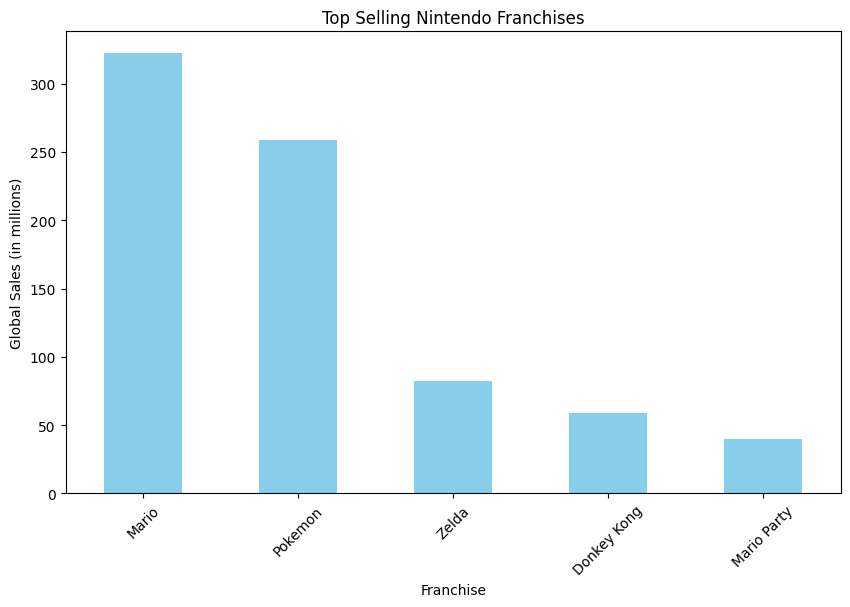

In [5]:
import matplotlib.pyplot as plt

# Summing up global sales for the top 5 Nintendo franchises and sorting them
top_franchises_sales = top_nintendo_franchises_df.groupby('Franchise')['Global_Sales'].sum().sort_values(ascending=False)

# Creating a bar plot for the top 5 selling Nintendo franchises
plt.figure(figsize=(10, 6))
top_franchises_sales.plot(kind='bar', color='skyblue')
plt.title('Top Selling Nintendo Franchises')
plt.xlabel('Franchise')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# DATA ANALYSIS

# Analysis of Question 1:
The graph below shows the consistent high sales of Nintendo compared to other Publishers. The question of why that is will be explored throughout this analysis. 

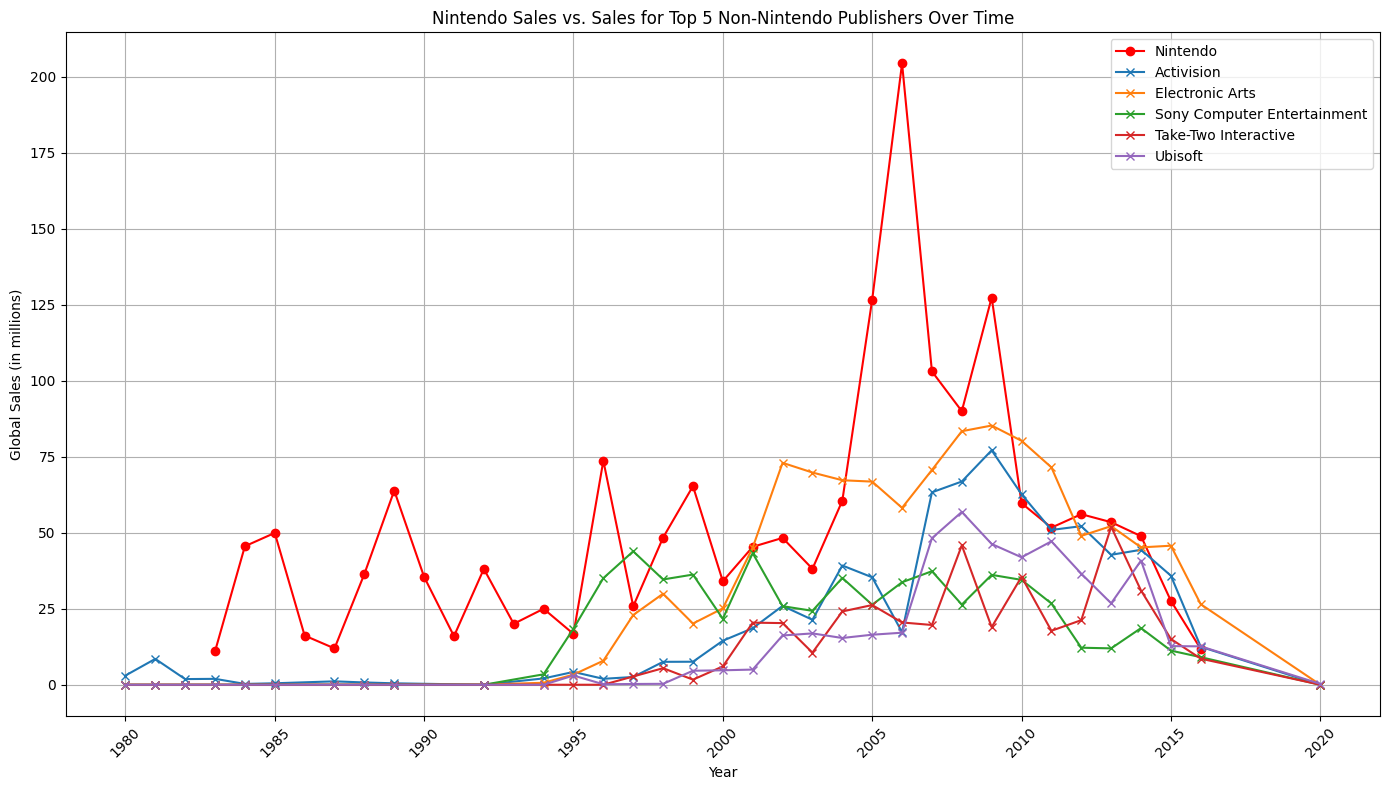

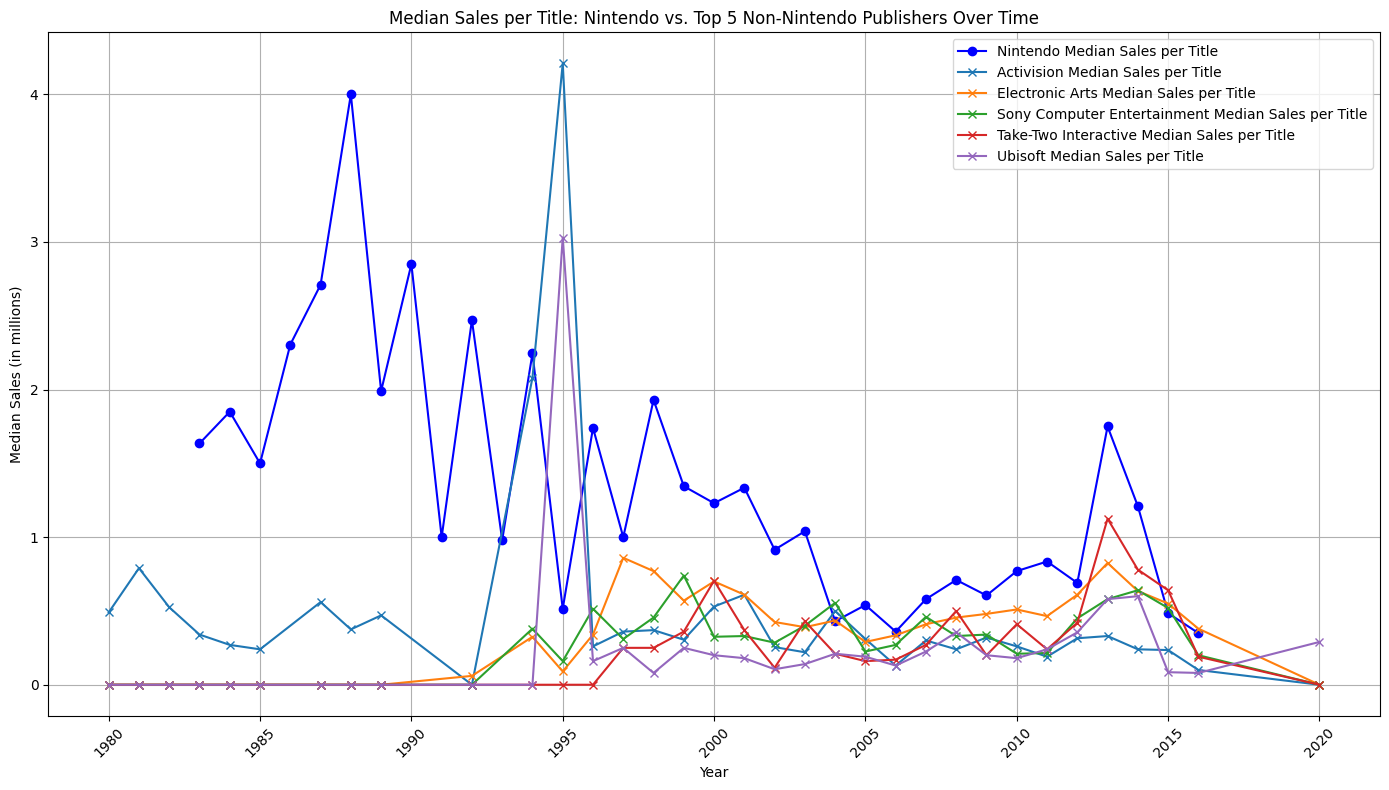

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Existing code for plotting yearly sales
nintendo_yearly_sales = nintendo_df.groupby('Year_of_Release')['Global_Sales'].sum()
total_sales_non_nintendo_publishers = non_nintendo_df.groupby('Publisher')['Global_Sales'].sum()
top_5_non_nintendo_publishers = total_sales_non_nintendo_publishers.nlargest(5).index
top_5_non_nintendo_df = non_nintendo_df[non_nintendo_df['Publisher'].isin(top_5_non_nintendo_publishers)]
top_5_non_nintendo_yearly_sales = top_5_non_nintendo_df.groupby(['Year_of_Release', 'Publisher'])['Global_Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(14, 8))
# Nintendo sales over time
plt.plot(nintendo_yearly_sales.index, nintendo_yearly_sales.values, label='Nintendo', color='red', marker='o')
# Sales for top 5 non-Nintendo publishers over time
for publisher in top_5_non_nintendo_yearly_sales.columns:
    plt.plot(top_5_non_nintendo_yearly_sales.index, top_5_non_nintendo_yearly_sales[publisher].values, label=publisher, marker='x')

plt.title('Nintendo Sales vs. Sales for Top 5 Non-Nintendo Publishers Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# New code for plotting median sales per title for top 5 non-Nintendo publishers
top_5_non_nintendo_median_sales = top_5_non_nintendo_df.groupby(['Year_of_Release', 'Publisher'])['Global_Sales'].median().unstack().fillna(0)
nintendo_median_sales = nintendo_df.groupby('Year_of_Release')['Global_Sales'].median()

plt.figure(figsize=(14, 8))
# Median sales per title for Nintendo
plt.plot(nintendo_median_sales.index, nintendo_median_sales.values, label='Nintendo Median Sales per Title', color='blue', marker='o')
# Median sales per title for each of the top 5 non-Nintendo publishers
for publisher in top_5_non_nintendo_median_sales.columns:
    plt.plot(top_5_non_nintendo_median_sales.index, top_5_non_nintendo_median_sales[publisher].values, label=f'{publisher} Median Sales per Title', marker='x')

plt.title('Median Sales per Title: Nintendo vs. Top 5 Non-Nintendo Publishers Over Time')
plt.xlabel('Year')
plt.ylabel('Median Sales (in millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

nintendo_df['Is_Nintendo'] = 1
non_nintendo_df['Is_Nintendo'] = 0

combined_df = pd.concat([nintendo_df[['Global_Sales', 'Is_Nintendo']], non_nintendo_df[['Global_Sales', 'Is_Nintendo']]])

X = combined_df[['Global_Sales']]  # Feature matrix
y = combined_df['Is_Nintendo']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9542464114832536
Confusion Matrix:
[[3179   16]
 [ 137   12]]


/tmp/ipykernel_3938/1539588191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nintendo_df['Is_Nintendo'] = 1
/tmp/ipykernel_3938/1539588191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nintendo_df['Is_Nintendo'] = 0


### Summary:
The Decision Tree classifier was used to predict whether a game was published by Nintendo based on its global sales.
The model achieved an accuracy of 0.95 on the test set, indicating its effectiveness in distinguishing between Nintendo and non-Nintendo published games based on sales data alone.

In [8]:
data1 = pd.read_csv('vgsales.csv')
data1['Is_Nintendo'] = data1['Publisher'].apply(lambda x: 1 if x == 'Nintendo' else 0)

In [9]:
import statsmodels.api as sm

data_clean = data1.dropna()

X = data_clean[['Is_Nintendo','NA_Sales']]
y = data_clean['Global_Sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.709e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        04:13:50   Log-Likelihood:                -5845.3
No. Observations:                6825   AIC:                         1.170e+04
Df Residuals:                    6822   BIC:                         1.172e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0002      0.008     -0.027      0.978      -0.015       0.015
Is_Nintendo     0.4678      0.035     13.444      0.000       0.400       0.536
NA_Sales        1.9211      0.007    264.349      0.000       1.907       1.935
==============================================================================
Omnibus:                     6792.391   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1229859.427
Skew:                           4.420   Prob(JB):                         0.00
Kurtosis:                      68.166   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysis of Question 2:
With Nintendos continued success over time, one could be curious about which franchises in particular have been the most successfull under the Nintendo publication umbrella. To tackle this question, the analysis below creates a dataframe highlighting Nintendo's seperate franchises and gathers data on total sales and the consistency of these sales. Since we are considering success, the data frame created will be filtered with the condition that any one title must have 2 million or more total sales.

In [10]:
import pandas as pd

# Read the dataset
vgsales_df = pd.read_csv('vgsales.csv')

# Filter the dataset to include only games published by Nintendo
nintendo_df = vgsales_df[(vgsales_df['Publisher'] == 'Nintendo') & (vgsales_df['Global_Sales'] >= 2)]

# Display the resulting DataFrame
nintendo_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,Donkey Kong Country,GBA,2003.0,Platform,Nintendo,1.20,0.48,0.29,0.07,2.04,78.0,26.0,8.9,53.0,Rare Ltd.,E
839,1080°: TenEighty Snowboarding,N64,1998.0,Sports,Nintendo,1.25,0.61,0.13,0.05,2.03,NaN,NaN,NaN,NaN,NaN,NaN
844,Pokémon Mystery Dungeon: Blue Rescue Team,DS,2005.0,Role-Playing,Nintendo,1.15,0.04,0.83,0.00,2.02,62.0,34.0,8.1,97.0,ChunSoft,E
848,Fire Emblem: Awakening,3DS,2012.0,Role-Playing,Nintendo,0.90,0.45,0.54,0.13,2.01,92.0,72.0,9.1,1130.0,Intelligent Systems,T


In [11]:
import pandas as pd

# Read the dataset
vgsales_df = pd.read_csv('vgsales.csv')

# Filter the dataset to include only games published by Nintendo
nintendo_df = vgsales_df[(vgsales_df['Publisher'] == 'Nintendo') & (vgsales_df['Global_Sales'] >= 2)]

# Create a function to infer franchise from game titles
def merge_franchise(title):
    if 'Mario' in title:
        return 'Mario'
    elif 'Zelda' in title:
        return 'Zelda'
    elif 'Poke' in title:
        return 'Pokemon'
    elif 'Wii' in title and 'Sports' not in title:
        return 'Wii Games'
    elif 'Kong' in title:
        return 'Donkey Kong'
    elif 'Super Smash' in title:
        return "Smash Bros"
    elif 'Animal Crossing' in title:
        return 'Animal Crossing'
    elif 'Tetris' in title:
        return "Tetris"
    elif 'Wii Sports' in title:
        return 'Wii Sports'
    elif 'Kirby' in title:
        return 'Kirby'
    elif 'Brain' in title:
        return 'Big Brain Academy'
    
    # Add more conditions for other franchises as needed
    else:
        return 'Other'

# Apply the function to create a new column for franchise
nintendo_df['Franchise'] = nintendo_df['Name'].apply(merge_franchise)

# Group the data by franchise
franchise_sales = nintendo_df.groupby('Franchise')['Global_Sales'].agg(['sum', 'count', 'std']).round(2)
franchise_sales['std'].fillna(0, inplace=True)

# Calculate the average sales per game for each franchise
franchise_sales['Average_Sales_Per_Game'] = (franchise_sales['sum'] / franchise_sales['count']).round(2)

# Sort the franchises by total sales in descending order
franchise_sales = franchise_sales.sort_values(by='sum', ascending=False)

# Rename the columns for clarity
franchise_sales = franchise_sales.rename(columns={'sum': 'Total_Sales', 'count': 'Number_of_Games', 'std': 'Sales_Std'})

# Display the resulting DataFrame
franchise_sales.head(12)

/tmp/ipykernel_3938/973672373.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nintendo_df['Franchise'] = nintendo_df['Name'].apply(merge_franchise)
/tmp/ipykernel_3938/973672373.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  franchise_sales['std'].fillna(0, inplace=True)


,Total_Sales,Number_of_Games,Sales_Std,Average_Sales_Per_Game
Franchise,,,,
Mario,485.93,58,8.47,8.38
Other,295.08,71,4.27,4.16
Pokemon,193.27,18,7.97,10.74
Wii Sports,115.30,2,35.19,57.65
Wii Games,101.25,8,10.15,12.66
Zelda,69.07,16,1.61,4.32
Donkey Kong,48.11,11,2.17,4.37
Big Brain Academy,42.06,3,6.85,14.02
Tetris,37.94,3,15.35,12.65


As we can see in the table above, Mario has, by far, the most total sales of any franchise in Nintendo's history. However, it does help that they released 58 different games within the franchise, whereas other franchises have released at most 18, that being Pokemon. Success cannot simply be defined by total sales for a franchise, the number of games a franchise produces, or the average sales per game generated because of variance between games. For example, although Tetris has 3 titles in its franchise, the original Tetris accounts for just over 30 million of the near 38 million sales for the franchise, meaning that one title in the franchise is directly responsible for ~80% of the total sales. That lone title is without question a success, but the franchise as a whole may not be. This is true for many franchises, where the variance between games' success can be too extreme for the entire franchise to be deemed more successful than another franchise. Therefore, there must be a further way to analyze success. 

In [12]:
import pandas as pd

# Read the dataset
vgsales_df = pd.read_csv('vgsales.csv')

# Filter the dataset to include only games published by Nintendo
nintendo_df = vgsales_df[(vgsales_df['Publisher'] == 'Nintendo') & (vgsales_df['Global_Sales'] >= 2)]

# Create a function to infer franchise from game titles
def merge_franchise(title):
    if 'Mario' in title:
        return 'Mario'
    elif 'Zelda' in title:
        return 'Zelda'
    elif 'Poke' in title:
        return 'Pokemon'
    elif 'Wii' in title and 'Sports' not in title:
        return 'Wii Games'
    elif 'Kong' in title:
        return 'Donkey Kong'
    elif 'Super Smash' in title:
        return "Smash Bros"
    elif 'Animal Crossing' in title:
        return 'Animal Crossing'
    elif 'Tetris' in title:
        return "Tetris"
    elif 'Wii Sports' in title:
        return 'Wii Sports'
    elif 'Kirby' in title:
        return 'Kirby'
    elif 'Brain' in title:
        return 'Big Brain Academy'
    
    # Add more conditions for other franchises as needed
    else:
        return 'Other'

# Apply the function to create a new column for franchise
nintendo_df['Franchise'] = nintendo_df['Name'].apply(merge_franchise)

# Group the data by franchise
franchise_sales = nintendo_df.groupby('Franchise')['Global_Sales'].agg([('Total_Sales', 'sum'), ('Number_of_Games', 'count'), ('std', 'std')])

# Calculate the average sales per game for each franchise and round to 2 decimal places
franchise_sales['Average_Sales_Per_Game'] = (franchise_sales['Total_Sales'] / franchise_sales['Number_of_Games']).round(2)

# Round the standard deviation to 2 decimal places
franchise_sales['std'] = franchise_sales['std'].round(2)

# Normalize the values
franchise_sales['Total_Sales_Normalized'] = round((franchise_sales['Total_Sales'] - franchise_sales['Total_Sales'].min()) / (franchise_sales['Total_Sales'].max() - franchise_sales['Total_Sales'].min()), 2)
franchise_sales['Average_Sales_Per_Game_Rounded'] = franchise_sales['Average_Sales_Per_Game']
franchise_sales['Sales_Std_Normalized'] = round((franchise_sales['std'] - franchise_sales['std'].min()) / (franchise_sales['std'].max() - franchise_sales['std'].min()), 2)

# Define weights for each factor
weight_total_sales = 0.5
weight_average_sales = 0.3
weight_sales_std = 0.2

# Calculate the weighted metric
franchise_sales['Weighted_Metric'] = round((weight_total_sales * franchise_sales['Total_Sales_Normalized']) + \
                                            (weight_average_sales * franchise_sales['Average_Sales_Per_Game_Rounded']) - \
                                            (weight_sales_std * franchise_sales['Sales_Std_Normalized']), 2)

# Sort the franchises by the weighted metric in descending order
franchise_sales = franchise_sales.sort_values(by='Weighted_Metric', ascending=False)

# Print the resulting DataFrame
franchise_sales.head(12)


/tmp/ipykernel_3938/3388242929.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nintendo_df['Franchise'] = nintendo_df['Name'].apply(merge_franchise)


,Total_Sales,Number_of_Games,std,Average_Sales_Per_Game,Total_Sales_Normalized,Average_Sales_Per_Game_Rounded,Sales_Std_Normalized,Weighted_Metric
Franchise,,,,,,,,
Wii Sports,115.30,2,35.19,57.65,0.21,57.65,1.00,17.20
Big Brain Academy,42.06,3,6.85,14.02,0.05,14.02,0.17,4.20
Wii Games,101.25,8,10.15,12.66,0.18,12.66,0.26,3.84
Tetris,37.94,3,15.35,12.65,0.04,12.65,0.42,3.73
Pokemon,193.27,18,7.97,10.74,0.38,10.74,0.20,3.37
Mario,485.93,58,8.47,8.38,1.00,8.38,0.21,2.97
Smash Bros,25.46,3,3.85,8.49,0.02,8.49,0.08,2.54
Animal Crossing,32.11,5,4.04,6.42,0.03,6.42,0.08,1.92
Other,295.08,71,4.27,4.16,0.59,4.16,0.09,1.52


In this newly expanded table, by standardizing total sales, average sales per game, and standard deviation as our 3 variables to determining success of a franchise over another, we can establish a weighted metric that provides a number we can attach to a franchise's success. We determined the weight behind the three variables as 0.5, 0.3, and 0.2 respectively because it does a fantastic job at considering all aspects while still giving slight priority to other variables, such as how we gave total sales more of a say in a franchises' success over average sales per game, since having a popular game is one of the largest apsects of being successful as a whole.

/tmp/ipykernel_3938/3200973088.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')  # You can use any colormap you prefer


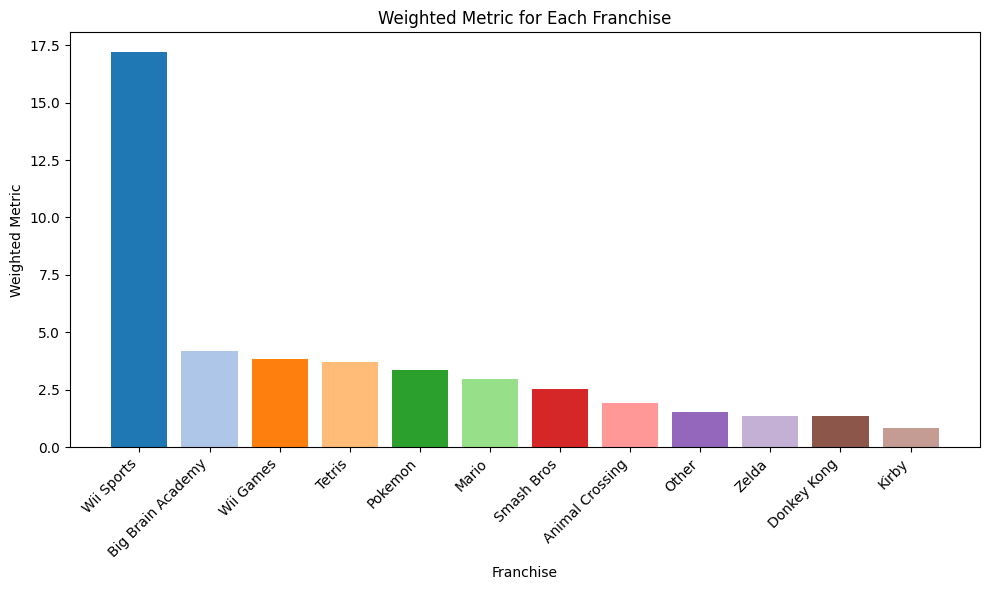

In [13]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Define a colormap
cmap = get_cmap('tab20')  # You can use any colormap you prefer

# Plot the weighted metric for each franchise with different colors
plt.figure(figsize=(10, 6))
colors = cmap(range(len(franchise_sales)))
plt.bar(franchise_sales.index, franchise_sales['Weighted_Metric'], color=colors)
plt.xlabel('Franchise')
plt.ylabel('Weighted Metric')
plt.title('Weighted Metric for Each Franchise')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar plot above provides a visualization of the analysis on franchise success using the weighted metric previously discussed. As we can see, this method of analysis indicates that the Wii Sports Franchise is the most successful Nintendo franchise, beating out the likes of Mario, Pokemon, and so much more.

A limitation to this analysis is that it is based on an abstract concept of "success". What one defines as successful can be different from another person's perspective, so although this model does a great job at attaching data and finite values to signify a success metric for every franchise, at its core there is no concrete way to go about analyzing success other than prioritizing certain variables over others. This is why, to some, it may seem questionable that the Mario franchise is only ranked 6th highest in success despite it having the top spot in total global sales for any one franchise. 

# Analysis of Question 3:
A hypotheses could be formed that the reasoning Nintendo has seen such success in its lifetime is its use of youthful rated games, meaning everyone is encouragaed to purchase and use their products, both young and old. The analysis below gathers a dataframe of the top 10% of the best selling 'E' rated games. The results show Nintendo as consuming nearly a quarter of that space, a space that encompases all age levels. 

In [14]:
# Filtering E rated games
E_rated_games = data1[data1['Rating'] == 'E']

top_10_percent_E_rated_games = E_rated_games.sort_values(by='Global_Sales', ascending=False).head(int(0.1 * len(E_rated_games)))
total_top_10_percent_E_rated_games = top_10_percent_E_rated_games.shape[0]
E_rated_nintendo_top_10_percent_games = top_10_percent_E_rated_games[top_10_percent_E_rated_games['Is_Nintendo'] == 1].shape[0]
percentage_E_rated_nintendo_top_10_percent = (E_rated_nintendo_top_10_percent_games / total_top_10_percent_E_rated_games) * 100
percentage_E_rated_nintendo_top_10_percent

23.809523809523807

To test this hypothesis, we'll see if there's a difference between the median sales E rated games verus T and M rated games over the years.

Plotting the total sales of each rating category seems to support the hypothesis that E for Everyone predicts success, but once median sales per category are plotted, it tells a different story: if one makes an average game in each category, the expected sales aren't markedly higher for E. In fact, from 2006 to 2011, E did worst, and it was only best in 2004. Perhaps there's a difference in focus on E as a category for Nintendo, and other publishers focus on other market segments.

/tmp/ipykernel_3938/1377798391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_games['Rating'] = rated_games['Rating'].replace({'E10+': 'E'})


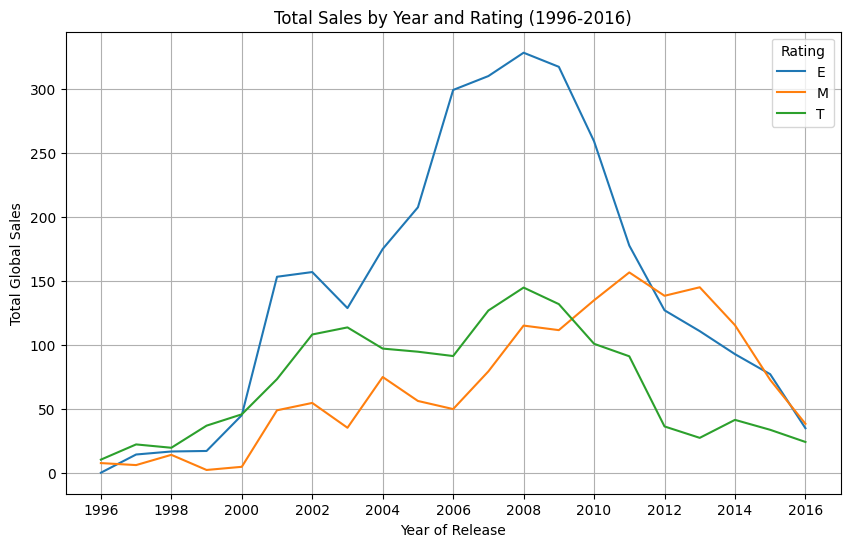

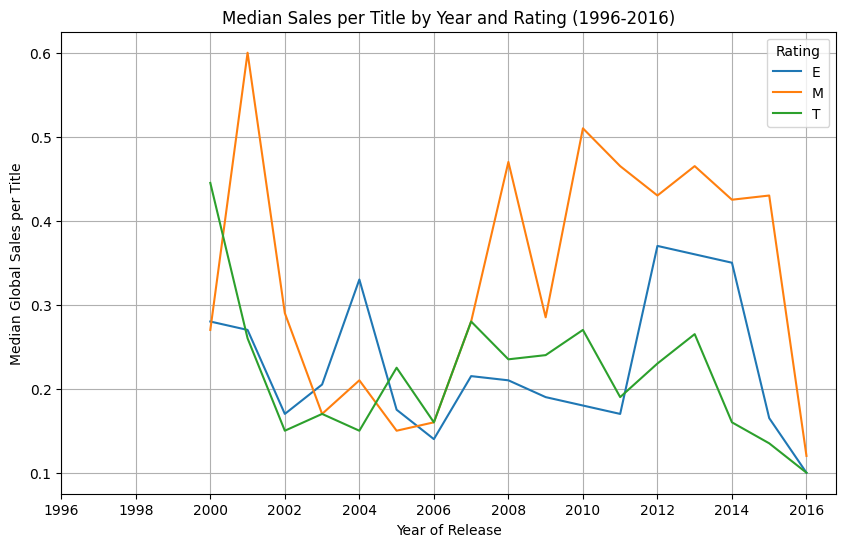

In [15]:
import matplotlib.pyplot as plt

# Omitting games with no rating
rated_games = data1.dropna(subset=['Rating'])

# Grouping E10+ games with E
rated_games['Rating'] = rated_games['Rating'].replace({'E10+': 'E'})

# Filtering games to only include E, T, or M rated games
filtered_games = rated_games[rated_games['Rating'].isin(['E', 'T', 'M'])]

# Omitting data before 1996 and after 2016
filtered_games = filtered_games[(filtered_games['Year_of_Release'] >= 1996) & (filtered_games['Year_of_Release'] <= 2016)]

# Grouping by year and rating, then summing up the sales
sales_by_year_and_rating = filtered_games.groupby(['Year_of_Release', 'Rating'])['Global_Sales'].sum().unstack()

# Plotting total sales by year and rating
sales_by_year_and_rating.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales by Year and Rating (1996-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales')
plt.legend(title='Rating')
plt.grid(True)
plt.xticks([year for year in range(1996, 2017) if year % 2 == 0])  # Only showing even numbered year labels
plt.show()

# Calculating median sales per title for each year in each of the three categories
# Omitting data before 2000 and after 2016
filtered_games_median = filtered_games[(filtered_games['Year_of_Release'] >= 2000) & (filtered_games['Year_of_Release'] <= 2016)]

median_sales_by_year_and_rating = filtered_games_median.groupby(['Year_of_Release', 'Rating'])['Global_Sales'].median().unstack()

# Plotting median sales per title by year and rating
median_sales_by_year_and_rating.plot(kind='line', figsize=(10, 6))
plt.title('Median Sales per Title by Year and Rating (1996-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Median Global Sales per Title')
plt.legend(title='Rating')
plt.grid(True)
plt.xticks([year for year in range(1996, 2017) if year % 2 == 0])  # Only showing even numbered year labels
plt.show()

In [16]:
sales_threshold = data1['Global_Sales'].quantile(0.9)

# Filter the dataframe to only include games in the top 10 percent of sales
top_10_percent_sales_games = data1[data1['Global_Sales'] >= sales_threshold]

In [17]:
top_5_franchises_sales = top_nintendo_franchises_df['Global_Sales'].sum()
total_nintendo_sales = nintendo_df['Global_Sales'].sum()
percentage_top_5_franchises_sales = (top_5_franchises_sales / total_nintendo_sales) * 100

percentage_top_5_franchises_sales

52.14254945265332

We see here that Nintendo's best selling franchises accumalte nearly 50% of total game sales, a fact that should be analyzed to see the reasoning for the success behind nintendo franchsies.

In [18]:
import statsmodels.api as sm
top_5_franchises = top_nintendo_franchises_df['Franchise'].unique()
nintendo_df['Is_Top_5_Franchise'] = nintendo_df['Name'].apply(lambda x: any(franchise in x for franchise in top_5_franchises)).astype(int)
X = nintendo_df[['Is_Top_5_Franchise']]
y = nintendo_df['Global_Sales']
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results = model.fit()
results.summary()

/tmp/ipykernel_3938/1541817146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nintendo_df['Is_Top_5_Franchise'] = nintendo_df['Name'].apply(lambda x: any(franchise in x for franchise in top_5_franchises)).astype(int)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9014
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.344
Time:                        04:13:52   Log-Likelihood:                -734.08
No. Observations:                 204   AIC:                             1472.
Df Residuals:                     202   BIC:                             1479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5785      0.880      7.477      0.000       4.844       8.313
Is_Top_5_Franchise     1.1813      1.244      0.949      0.344      -1.272       3.635
==============================================================================
Omnibus:                      219.144   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6838.526
Skew:                           4.266   Prob(JB):                         0.00
Kurtosis:                      30.051   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Filter the dataset for the years 1996 to 2016
vgmarketshare_df = vgsales_df[(vgsales_df['Year_of_Release'] >= 1996) & (vgsales_df['Year_of_Release'] <= 2016)]

# Calculate total sales for each year
yearly_sales_total = vgmarketshare_df.groupby('Year_of_Release')['Global_Sales'].transform('sum')

# Divide each game's sales by the total sales of all games for that year to get market share
vgmarketshare_df['Market_Share'] = vgmarketshare_df['Global_Sales'] / yearly_sales_total
vgmarketshare_df.head()

/tmp/ipykernel_3938/3213123958.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgmarketshare_df['Market_Share'] = vgmarketshare_df['Global_Sales'] / yearly_sales_total


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Market_Share
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,0.159257
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,0.052874
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,0.049736
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,0.157519
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,0.057505


This model shows the prediction of global sales for nintendo games. It contains a predictor variable defining whether or not the game falls within the top 5 nintendo franchises. If it does, the model predicts there to be a 3.5 million dollar increase in sales for that game. 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Global_Sales' as the success metric for a franchise
# Filtering data for top 5 Nintendo franchises
top_5_franchises = top_nintendo_franchises_df['Franchise'].unique()[:5]
top_5_franchises_df = nintendo_df[nintendo_df['Name'].apply(lambda x: any(franchise in x for franchise in top_5_franchises))]

# Selecting relevant features and target variable
features = top_5_franchises_df[['Genre', 'Platform', 'NA_Sales']]
target = top_5_franchises_df['Global_Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating a pipeline with OneHotEncoder for categorical features and LinearRegression model
categorical_features = ['Genre', 'Platform']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = make_column_transformer(
    (categorical_transformer, categorical_features),
    remainder='passthrough'
)

model = make_pipeline(preprocessor, LinearRegression())

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 30.26
R^2 Score: 0.65


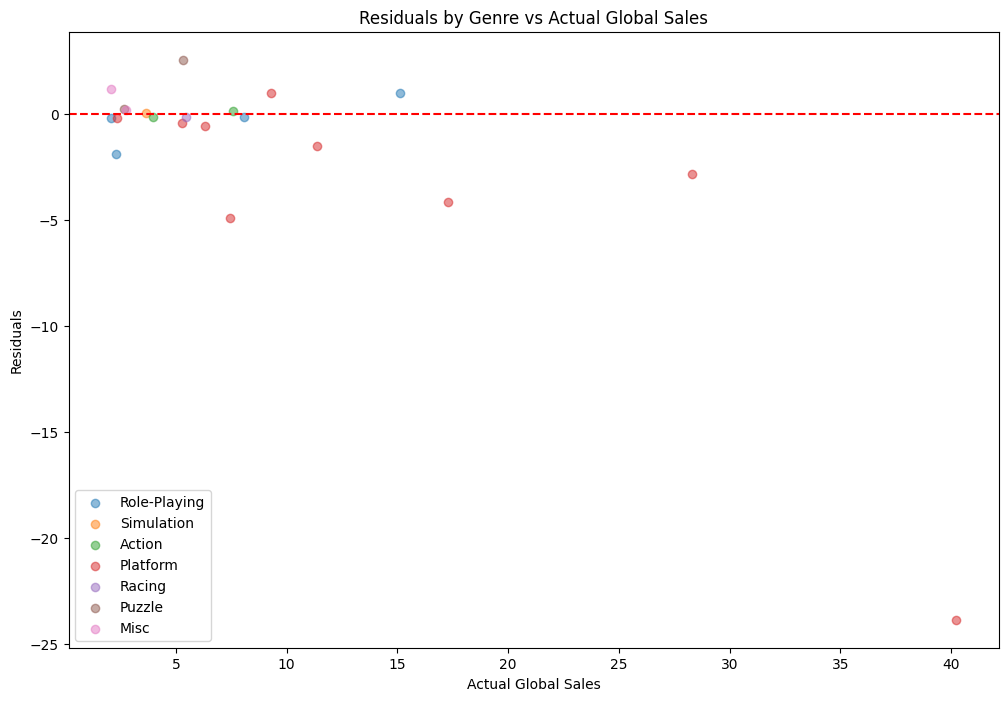

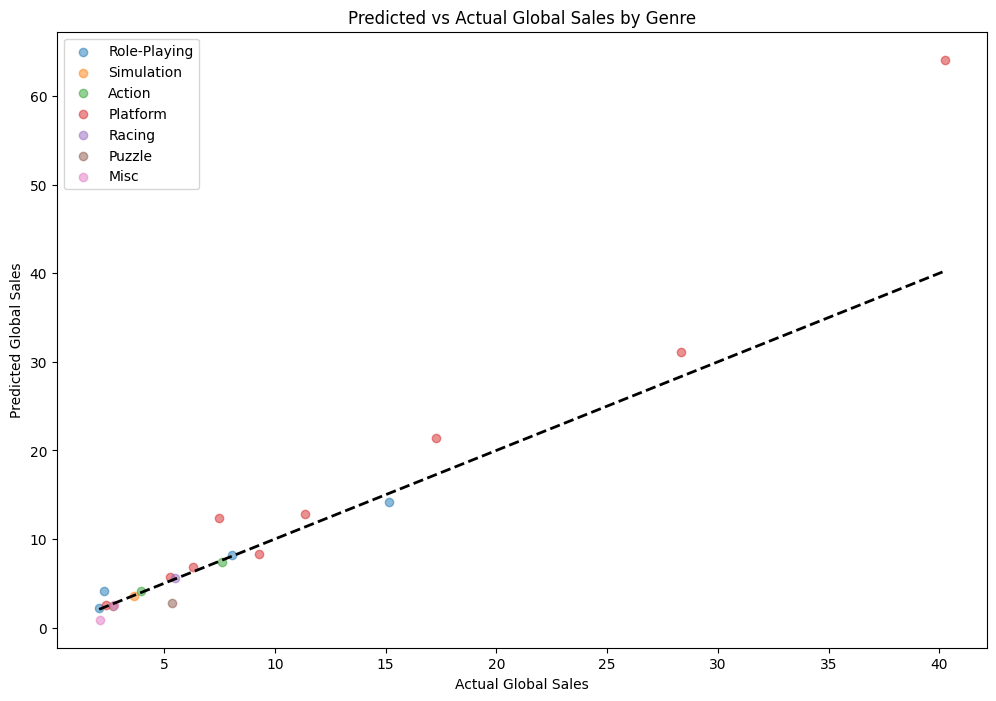

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are defined in your environment as per the previous cells
# and that 'features' DataFrame contains the 'Genre' information for each game.

# Merging the residuals with the genres to analyze residuals by genre
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
residuals_df['Residuals'] = residuals_df['Actual'] - residuals_df['Predicted']
residuals_df = residuals_df.join(features['Genre'], how='left')  # Assuming the index matches

# Plotting residuals by genre
plt.figure(figsize=(12, 8))
for genre in residuals_df['Genre'].unique():
    subset = residuals_df[residuals_df['Genre'] == genre]
    plt.scatter(subset['Actual'], subset['Residuals'], label=genre, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Residuals')
plt.title('Residuals by Genre vs Actual Global Sales')
plt.legend()
plt.show()

# Plotting predicted vs actual by genre
plt.figure(figsize=(12, 8))
for genre in residuals_df['Genre'].unique():
    subset = residuals_df[residuals_df['Genre'] == genre]
    plt.scatter(subset['Actual'], subset['Predicted'], label=genre, alpha=0.5)

plt.plot([residuals_df['Actual'].min(), residuals_df['Actual'].max()], 
         [residuals_df['Actual'].min(), residuals_df['Actual'].max()], 'k--', lw=2)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Predicted vs Actual Global Sales by Genre')
plt.legend()
plt.show()

This model uses predictors of genre, platform, and regional sales to predict global sales for the top Nintendo franchises. Linear regression was used to predict global sales. The graphs show how this model acurately predicts sales for seemingly every genre. To better distinguish how sales may differ between genres, a KNearest neaibors model may be more fitting to our data types. The model below shows how predictability for each genre may be more variable, but may ask have a high risk-reward feature. We see that role-playing games are often predicted as being high sellers, but that may not always be the case. Meanwhile, the adventure genre has lower variablilty, but predictably a lower sales ceiling.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import numpy as np

# This script aims to predict the global sales of Nintendo games using a K-Nearest Neighbors regressor,
# with an additional step to remove outliers from the dataset before training the model.
# The features used for prediction include whether the game belongs to a top 5 franchise and its genre.
# The dataset is first cleaned to remove outliers, then split into training and testing sets.
# It undergoes preprocessing where numerical features are scaled and categorical features are one-hot encoded.
# Finally, the KNN model is trained, and its performance is evaluated using the root mean squared error (RMSE) metric.
Q1 = nintendo_df['Global_Sales'].quantile(0.25)
Q3 = nintendo_df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = nintendo_df[(nintendo_df['Global_Sales'] >= lower_bound) & (nintendo_df['Global_Sales'] <= upper_bound)]

X = filtered_df[['Is_Top_5_Franchise', 'Genre', 'NA_Sales']]  # Features
y = filtered_df['Global_Sales']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Is_Top_5_Franchise','NA_Sales']),
        ('cat', OneHotEncoder(), ['Genre'])
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

1.0717531482626075

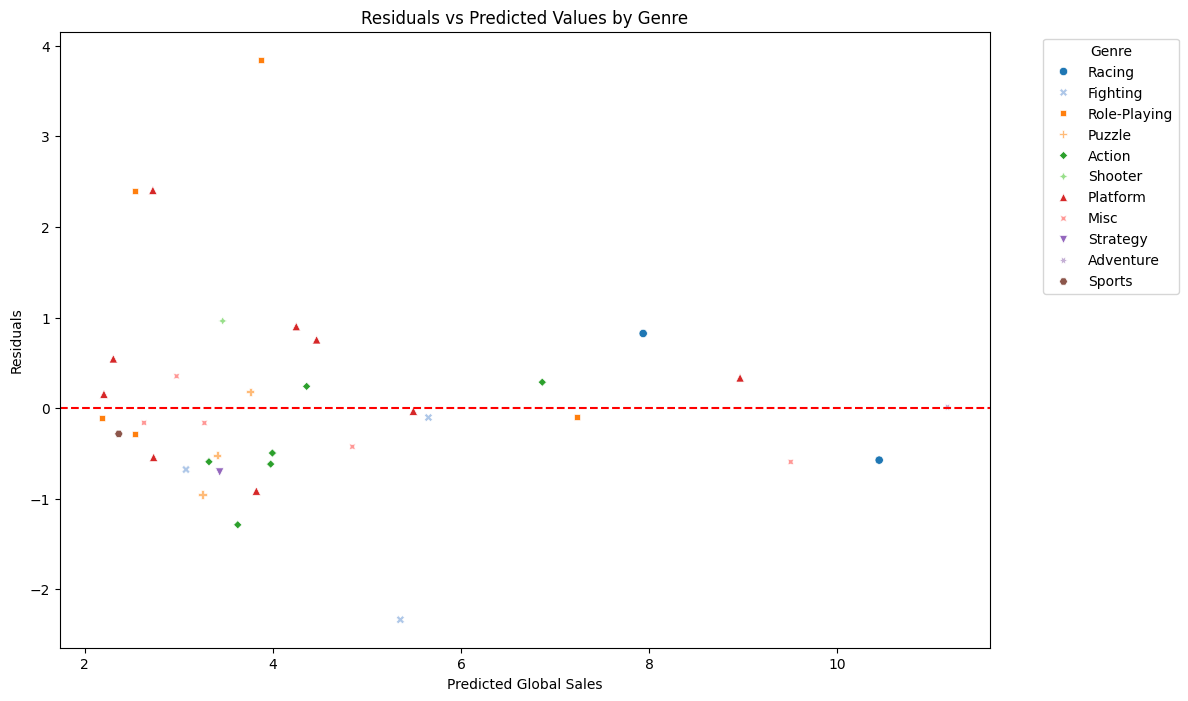

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined elsewhere in your notebook
# Calculate residuals
residuals = y_test - y_pred

residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals, 'Genre': X_test['Genre']})

# Plotting the residuals with distinction based on Genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Predicted', y='Residuals', hue='Genre', data=residuals_df, palette='tab20', style='Genre')
plt.title('Residuals vs Predicted Values by Genre')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Global Sales')
plt.ylabel('Residuals')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We can do the same for platform as seen below. We see here that the older consoles such as the NES have lower variability of results for this model, but newer consoles have higher variability of results. This is most likely due to factors such as greater number of games outside of the traditional top 5 franchises, causing less predictability of our model. 

In [24]:
Q1 = nintendo_df['Global_Sales'].quantile(0.25)
Q3 = nintendo_df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = nintendo_df[(nintendo_df['Global_Sales'] >= lower_bound) & (nintendo_df['Global_Sales'] <= upper_bound)]

X = filtered_df[['Is_Top_5_Franchise', 'Platform', 'NA_Sales']]  # Features
y = filtered_df['Global_Sales']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Is_Top_5_Franchise', 'NA_Sales']),
        ('cat', OneHotEncoder(), ['Platform'])
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

1.0441794916635792

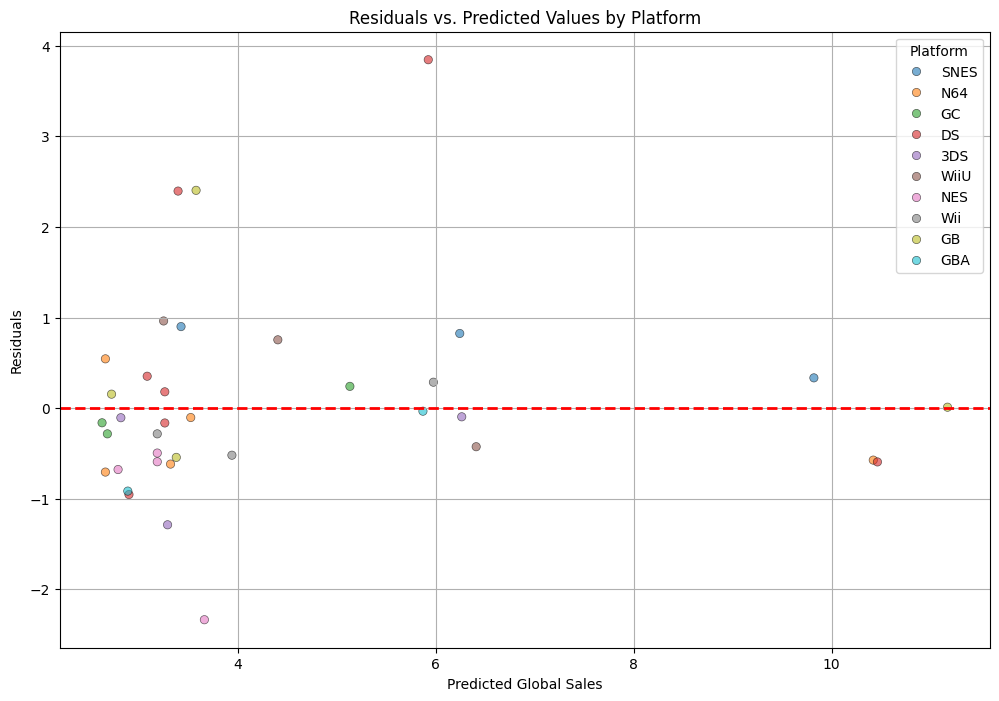

In [25]:
import seaborn as sns

# Merging the residuals with the test dataset to include the 'Platform' information
residuals_df['Residuals'] = residuals
residuals_df['Predicted'] = y_pred
residuals_df['Platform'] = X_test['Platform'].values

# Plotting the residuals with hue for platform
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Predicted', y='Residuals', hue='Platform', data=residuals_df, palette='tab10', edgecolor='k', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Global Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values by Platform')
plt.grid(True)
plt.legend(title='Platform')
plt.show()

# INTERPRETATION & REPORTING

# Question 1

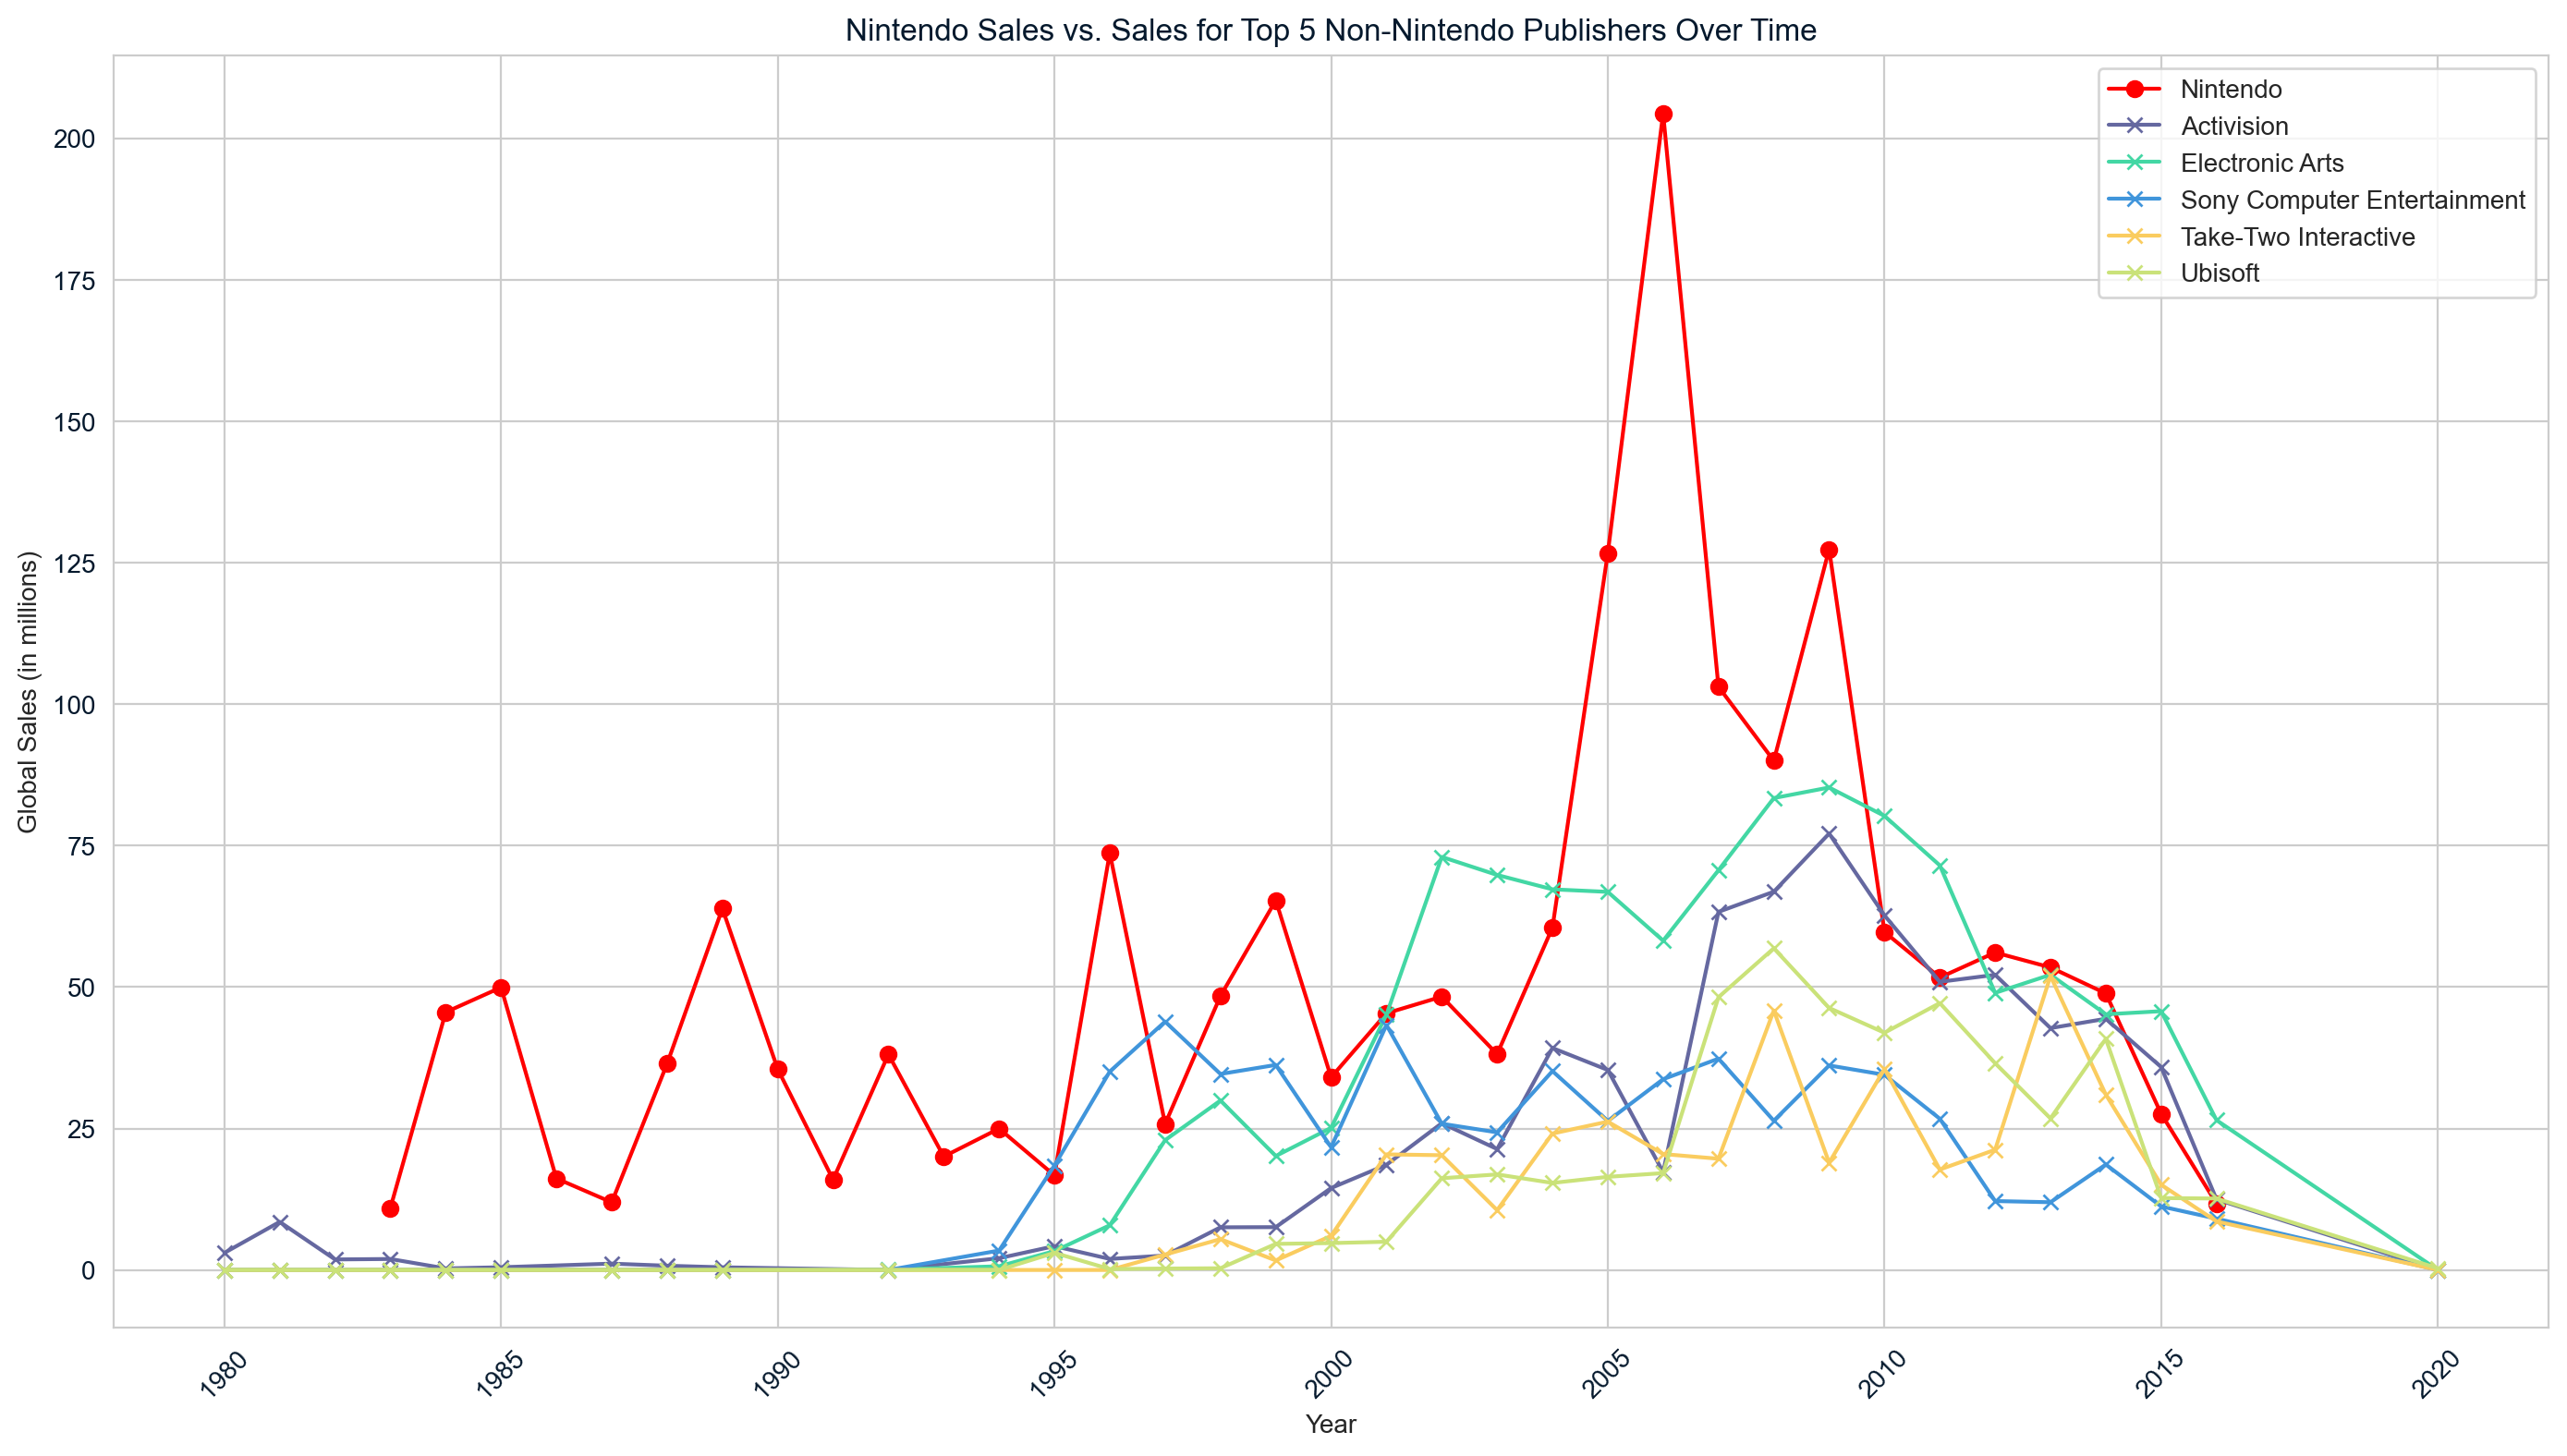
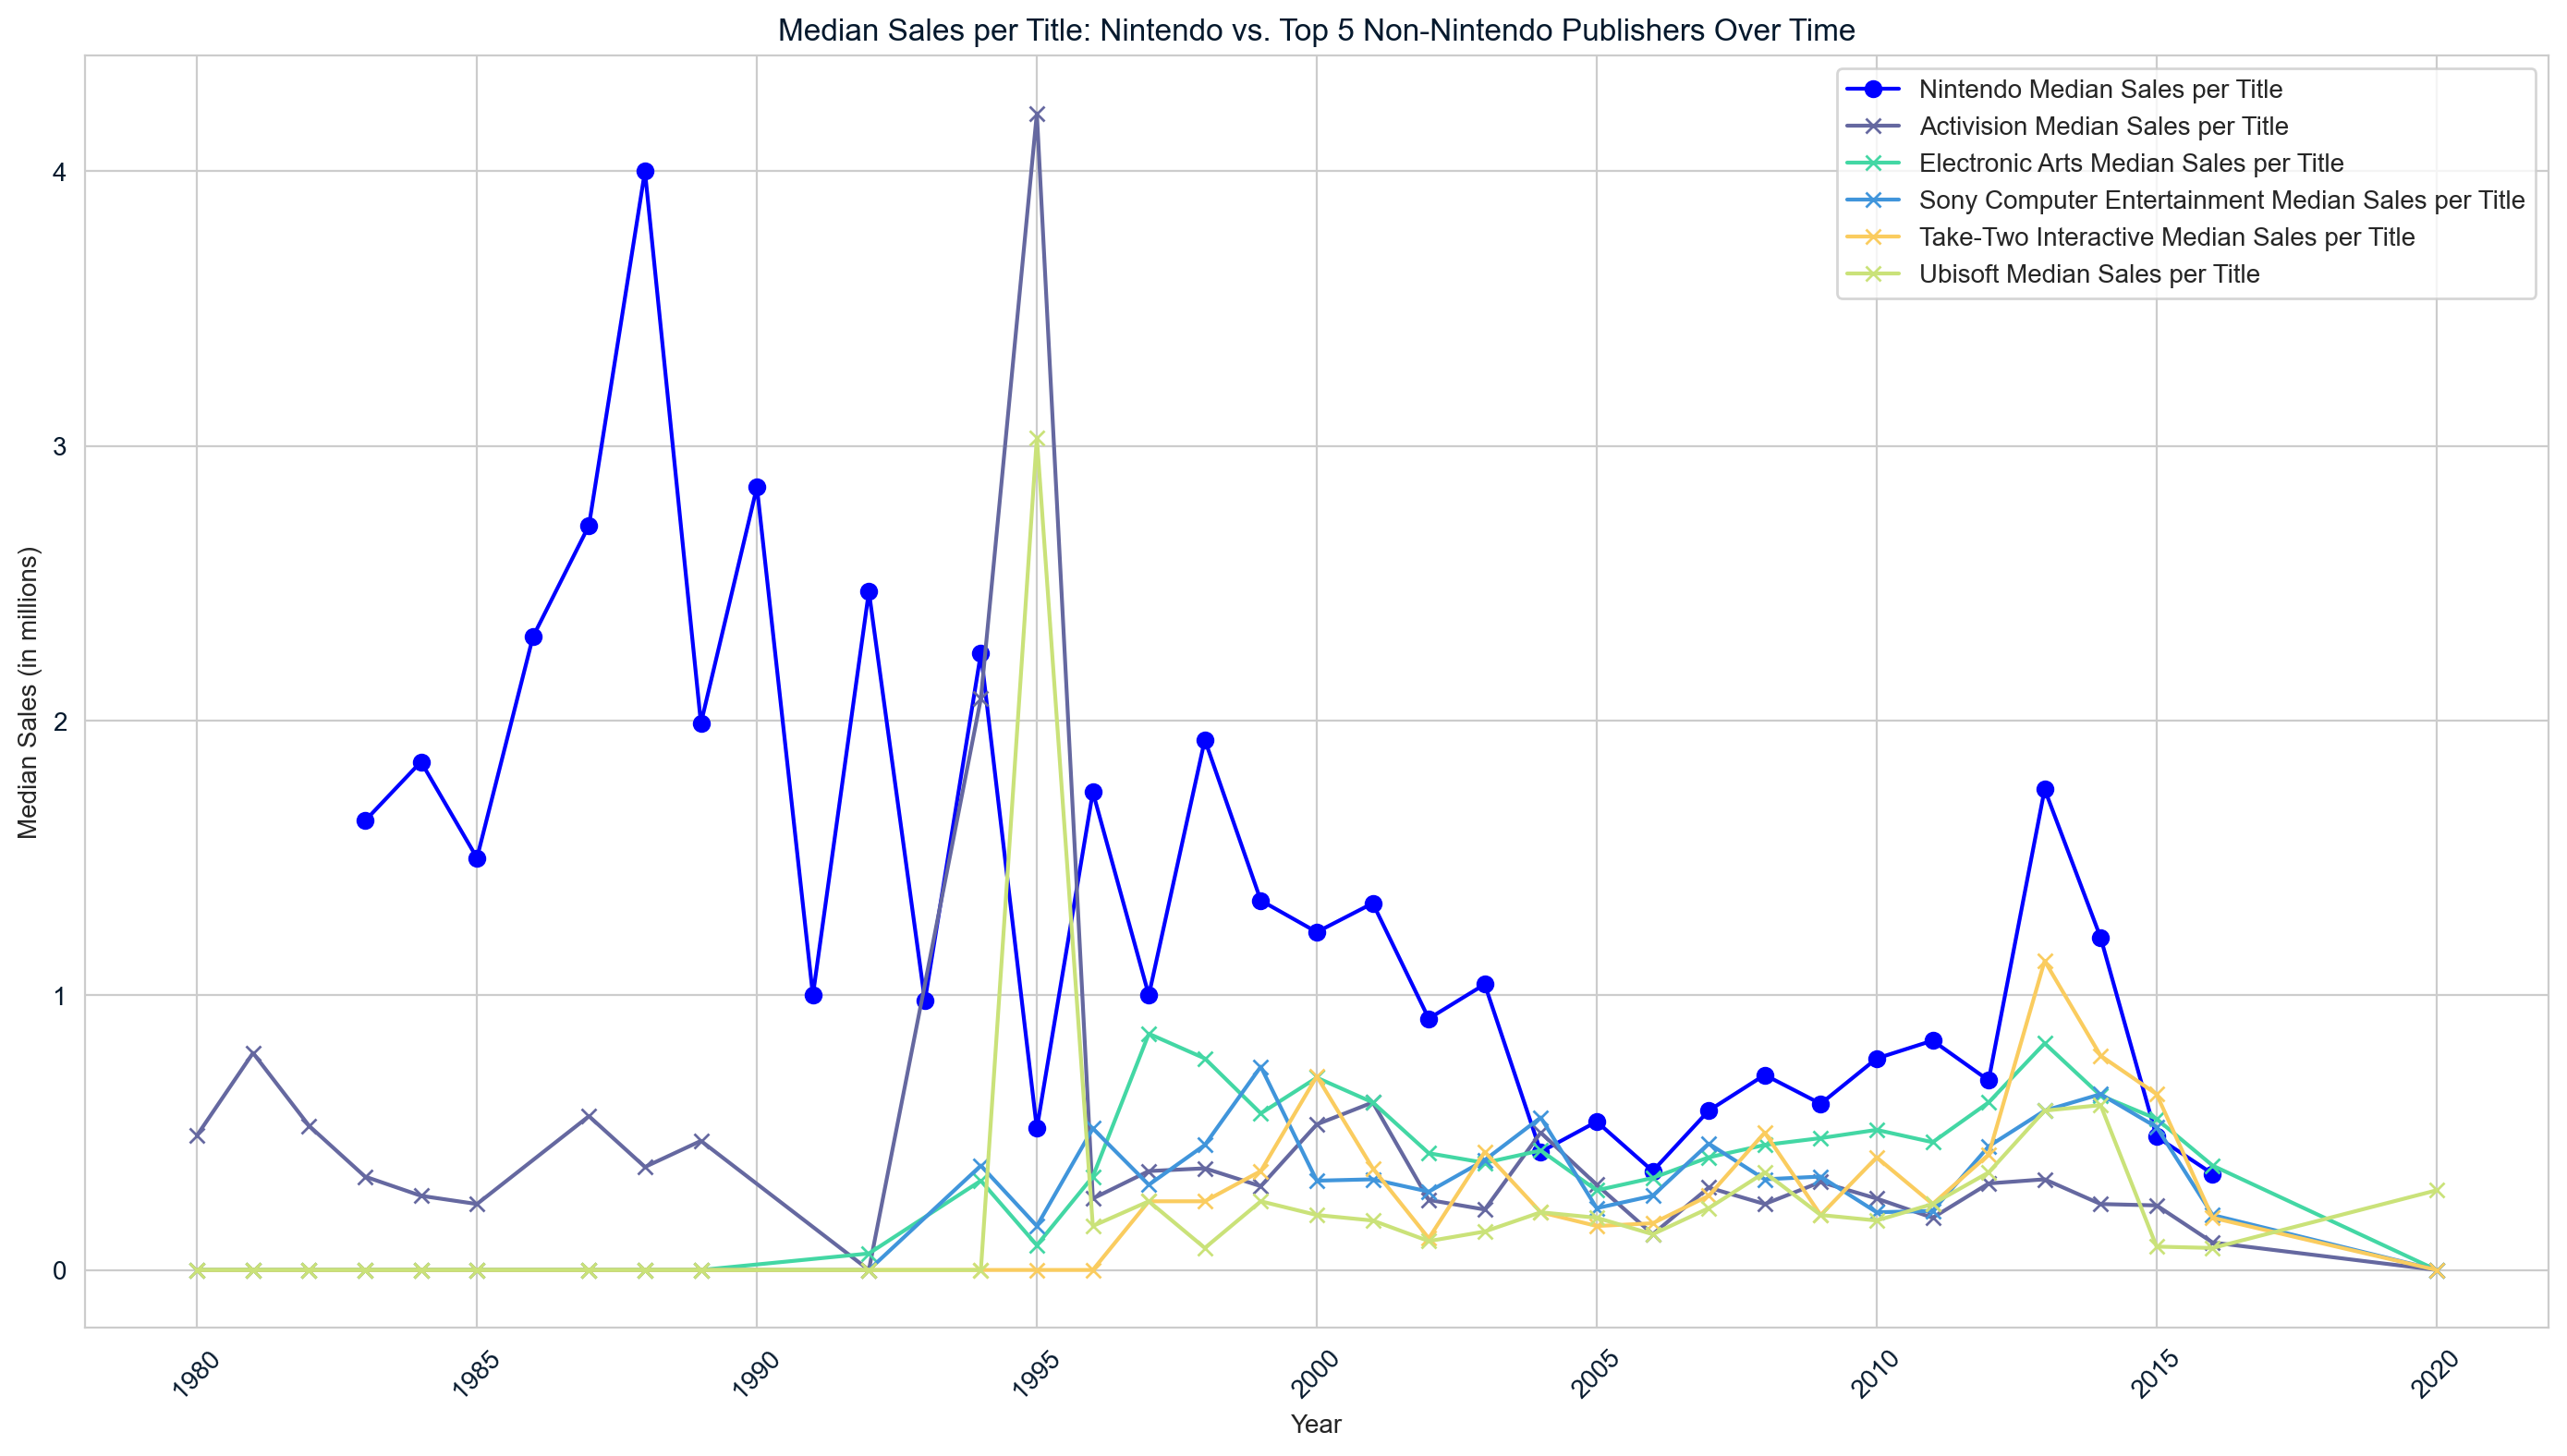
From the charts, it can clearly be seen that Nintendo has consistently dominated the global market for more than 30 years with its only noteworthy period not on top coinciding with a large spike in both Activision and Ubisoft in the mid-90s. Looking at the data, it appears both companies had singular breakout hits that year, which skews their median to the maximum. Activision (Blizzard at the time) with Warcraft II, and Ubisoft with Rayman. Nintendo experienced a major spike in total sales of its own from 2005 to 2009 which corresponds to its all-time bestselling title, Wii Sports. Since then, Nintendo's sales have steadily declined in similar manner to the other five publishers which reflects a general decline in the market rather than any one company's fall.

# Question 2

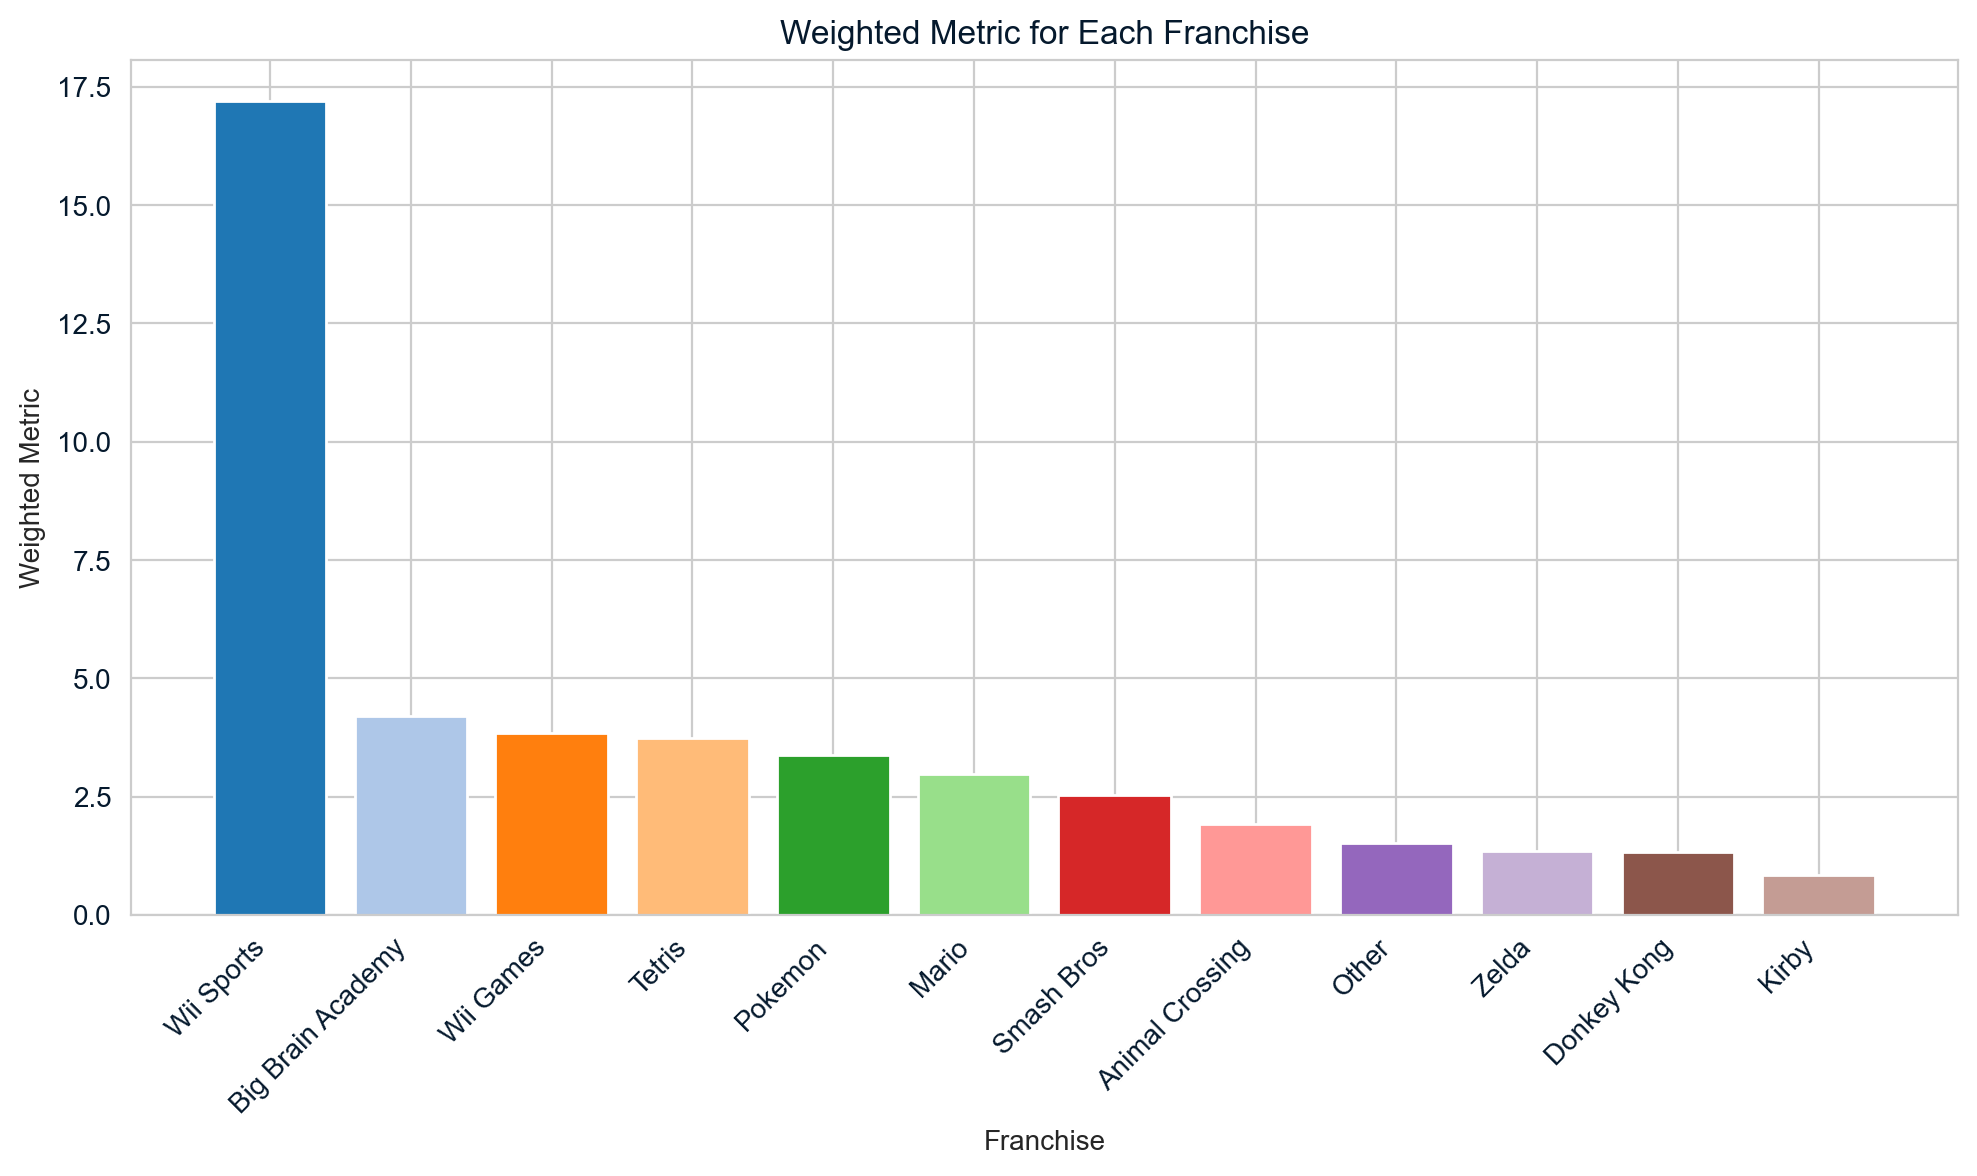
From the analysis on the success of Nintendo Franchises, it is clear that Wii Sports is the most successful Nintendo franchise. The large reason for this is because Wii Sports has only 2 games: Wii Sports and Wii Sports Resort. Wii Sports, the original, is the highest grossing Nintendo title of all time, with over 82 million sales. Due to that alone, the Wii Sports franchise as a whole is going to be deemed successful any way you slice it, but further adding to the success of the entire franchise was Wii Sports Resort, the sequel. Although this sequel had half as many global sales as its predecessor, it still boasts the 4th most global sales for a Nintendo title. Since the entire franchise category is made up of only 2 games, both being in the top 4 in global sales for a Nintendo title, even with it having the highest standard deviation amoung any of the qualifying franchises, it still trumps all other franchises in our model of success, and rightfully so. 

Outside of the obvious frontrunner in success according to this model, most other franchises seem to be relatively close in overall success. Although Mario as a franchise is the most known in Nintendo's history, as well as holding the title for the most global sales as a total franchise, Mario gets brought down by the fact that it has so many more titles released than all other franchises on this list, with many of them just qualifying over the 2 million cutoff mentioned at the beginning. Due to this, even though it has the highest standardized total sales among these franchises, it is only 6th highest in standardized average sales per game while also having the 4th highest standardized standard deviation, therefore bringing down its weighted metric of success and placing it as the 6th most successful franchise on this list.

Another conclusion we can draw from this analysis is that the number of titles a franchise has released greatly impacts its measure of "success." Naturally, one might think that if a franchise has more released titles that it would be considered to be more successful since they must receive the funding to make more games. However, this analysis does not prove such, in fact, it could lead to the opposite. The franchises in the sample with the most titles includes the Other category, Mario, Pokemon, Zelda, and Donkey Kong. As seen in the plot and its associated dataframes, Pokemon and Mario are outside of the top 3 and Other, Zelda, and Donkey Kong are 3 of the bottom 4 franchises in terms of success. The correlation between having a larger number of titles and falling down the ranks in terms of success appears to be evident, and this is due to the fact average sales per game and standard deviation among sales of titles within a franchise are two of the three variables in determining success. For the previously named franchises, they have many titles but usually one or two of them are responsible for the bulk of the sales. Since there is a wide margin in terms of sales for titles within a franchise, the variance becomes high, thus taking away from the weighted metric of success. Furthermore, since a franchise had that hit game, they were inclinced to make more titles in the series, therefore contributing to lowering the average. Directly because of this correlation, we see that unless a franchise had either an absolute best-seller or a stable, medium-level collection of titles in their franchise, they fall down in terms of success because of the lower-performing titles in the franchise, which only becomes more possible the more you make titles.

The takeaway from this is that the data demonstrates long term success tends to regress toward a lower mean for established IPs, and breakout success tends to come from original IPs. Of course, since this is analyzing top sales, it doesn't show the other end of the variance for original IPs which didn't end up being successful

# Question 3

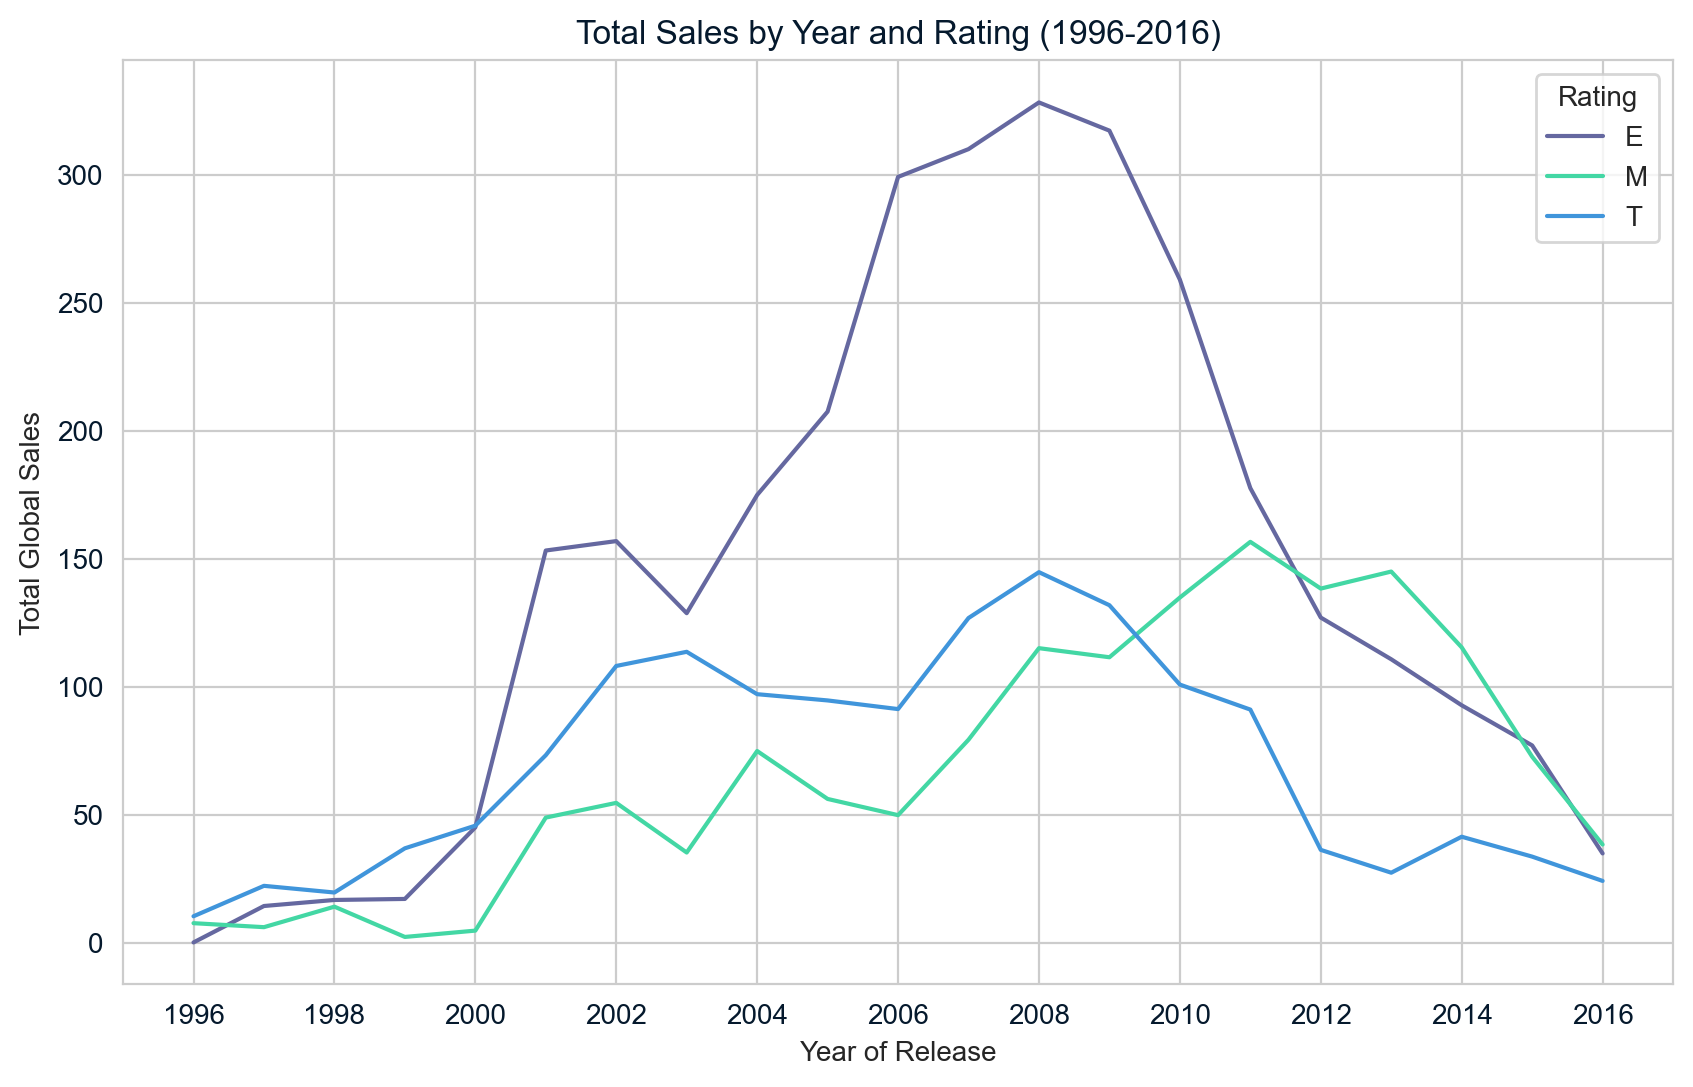!
In analyzing Nintendo's continued success, it is worth seeing how the platforms their games run on as well as their genres can predict the sales of individual titles. Nintendo's games are predominantly available exclusively on Nintendo consoles such as the NES, Wii, and Switch depending on release year. Most other publishers produce games compatible with multiple consoles such as different versions of the XBOX and Playstation along with PC. It is curious therefore that Nintendo dominates the global market despite the limitations of their games and exclusive consoles. This may be explained by the same reality with the opposite intuition; owners of Nintendo consoles may be expected to predominantly buy Nintendo games while owners of other consoles may buy games from several different publishers.

Another hypothesis explored in the data analysis is whether Nintendo's success is attributable to the overwhelming presence of "E" rated games in their catalog which can be enjoyed by customers of all ages rather than certain demographics prescribed by more mature ratings. This hypothesis doesn't appear to be supported through the comparison of sales per title versus ratings. In recent years, Teen and Mature ratings have been a more consistent predictor of higher sales, however, this could be attributed to a difference in focus between Nintendo and the rest of the industry. What it does show is that rating alone doesn't account for Nintendo's success, and there's not enough games in the T and M category published by Nintendo to compare the trend within the publisher to the rest of the industry.

# Contribution Report

Troy - reproducibility aspect with docker and git, Analysis of question one with Decision tree model. Data Cleaning/preparation. Analysis of question 3 with nearest neighbors model.

Cole - data analysis and interpretation focus. Specifically the analysis and write up of Question 4, as well as aiding in tweaking everything else with the rest of the group. 

Sean - Added to and refined data analysis of ratings as predictor, exploratory analysis of other factors on success, and contributed to interpretation and reporting for Q2 and Q3

Zach - Interpretations for Q1 and Q3